In [1]:
import torch
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv("C:\\Users\\uslumt\\Desktop\\Wafer\\test.csv", sep = ";", header = 0, decimal = ",")

In [15]:
print(data.head(5))
set(data[lot])

     lot  wafer  x   y      ring      spot     trend  twospots  crescent  \
0  Lot_5    801  1  67  0.081565  0.000213  0.507566  0.020513 -0.000526   
1  Lot_5    801  1  68  0.080407  0.000029  0.528584  0.021047 -0.010879   
2  Lot_5    801  1  69  0.083291  0.000043  0.498000  0.021185  0.005890   
3  Lot_5    801  1  70  0.081118 -0.000052  0.532268  0.022842 -0.001203   
4  Lot_5    801  1  71  0.080389  0.000300  0.544996  0.022436 -0.008338   

   ring_pure     spot_pure  trend_pure  twospots_pure  crescent_pure  
0   0.078182  2.039234e-14    0.511632       0.020651  -4.843146e-17  
1   0.078587  3.809805e-14    0.511632       0.021166  -5.076064e-17  
2   0.078906  7.046847e-14    0.511632       0.021654  -5.290285e-17  
3   0.079153  1.290456e-13    0.511632       0.022114  -5.561296e-17  
4   0.079340  2.339638e-13    0.511632       0.022545  -5.766655e-17  


In [11]:
labels = {
    0: "ring",
    1: "spot",
    2: "trend",
    3: "twospots",
    4: "crescent"}
        
print(labels)

{0: 'ring', 1: 'spot', 2: 'trend', 3: 'twospots', 4: 'crescent'}


In [12]:
""" First Wafer data """
df = data
df = df.drop(df.columns[slice(9, 14 , 1)], axis=1) #drop the xxx_pure
df.loc[df["wafer"] == 1]

,lot,wafer,x,y,ring,spot,trend,twospots,crescent
0,Lot_1,1,1,67,0.033203,0.000065,0.312295,0.039043,0.007720
1,Lot_1,1,1,68,0.032817,-0.000005,0.288025,0.040563,0.002636
2,Lot_1,1,1,69,0.033321,0.000025,0.261521,0.041602,-0.000592
3,Lot_1,1,1,70,0.032707,-0.000014,0.290741,0.040822,0.008510
4,Lot_1,1,1,71,0.032220,-0.000049,0.256578,0.042526,0.009654
...,...,...,...,...,...,...,...,...,...
17504,Lot_1,1,115,100,0.033149,0.000074,0.117093,0.044363,0.425392
17505,Lot_1,1,115,101,0.033553,0.000010,0.191086,0.044552,0.424840
17506,Lot_1,1,115,102,0.032644,0.000017,0.161394,0.044907,0.431352
17507,Lot_1,1,115,103,0.032956,-0.000150,0.168589,0.046049,0.422307


## Lets randomly plot 5 wafer patterns from dataset

Number of wafers in the data set 200


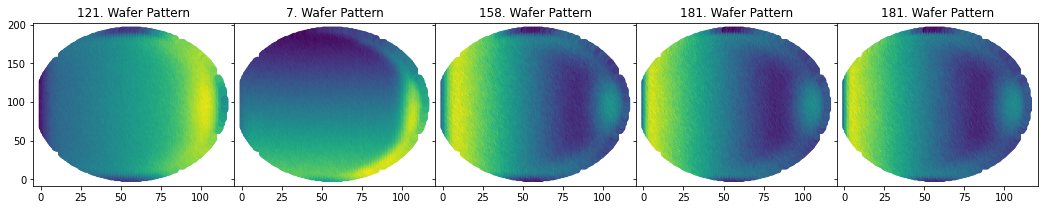

In [13]:
""" Pattern Types xxx_pure are not relevant for analysis (as they contain the same wafermaps without noise)! """
wafer_count = len(np.unique(data["wafer"].to_numpy()))
print("Number of wafers in the data set {}".format(wafer_count))

randomlist = []
for k in range(0, 5):
    n = random.randint(0, wafer_count) # TODO : randint(200*(datasetIndex - 1), 200(datasetIndex)) max datasetIndex is 4
    randomlist.append(n)
    
indx = 0
fig, axs = plt.subplots(1,5, figsize = (18, 3), sharex = 'col', sharey = 'row')
fig.subplots_adjust(hspace = .5, wspace = .001)
for i in randomlist :
    wafer = data.loc[data["wafer"] == i]
    width = wafer.loc[:, "x"].to_numpy()
    lenght = wafer.loc[:, "y"].to_numpy()
    
    ring = wafer.loc[:, labels[0]].to_numpy()
    spot = wafer.loc[:, labels[1]].to_numpy()
    trend = wafer.loc[:, labels[2]].to_numpy()
    twospots = wafer.loc[:, labels[3]].to_numpy()
    crescent = wafer.loc[:, labels[4]].to_numpy()
    
    axs[indx].scatter(width, lenght, c = ring + spot + trend + twospots + crescent)
    axs[indx].set_title("{}. Wafer Pattern" .format(i))
    
    indx += 1
    

In [5]:
"""
Gaussian Mixture model, apperantly spot is the dominant label that lead.
may be check the other datasets to come up with other labels.
every data point has some weights in the pattern, 
check if I can see the weight on 2D.

"""

from sklearn.mixture import GaussianMixture
X = np.array([[1] , [2], [3], [4], [5]])
gm = GaussianMixture(n_components = 5, random_state = 0).fit(X)
print(max(X, key=abs))
gm.means_



[5]


array([[5.],
       [2.],
       [4.],
       [1.],
       [3.]])

0.9146633191568234
0.9356329381253847
0.6959199071857445
0.9184759877908805
0.9381575733519935
2
          lot  wafer   x    y      ring      spot     trend  twospots  \
866846  Lot_5    850  57  190  0.011080  0.000013 -0.280260  0.000066   
866847  Lot_5    850  57  191  0.010944  0.000057 -0.278629  0.000090   
866848  Lot_5    850  57  192  0.010756  0.000057 -0.233351 -0.001722   
866849  Lot_5    850  57  193  0.011601  0.000076 -0.231698 -0.001178   
866850  Lot_5    850  58    1  0.011047 -0.000049  0.545204  0.000814   

        crescent  
866846  0.037174  
866847  0.045853  
866848  0.043653  
866849  0.039969  
866850  0.040712  


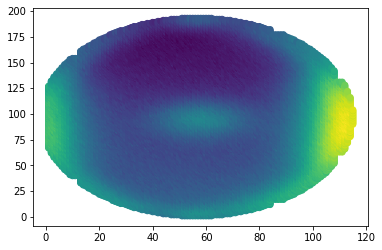

In [10]:
from numpy.linalg import norm
from scipy.stats import iqr
df = data
df = df.drop(df.columns[slice(9, 14 , 1)], axis=1) #drop the xxx_pure
for i in range(800 ,  1000):
    """
    get the index of each wafer and decide the wafermap charecteristic acording to different scaling 
    Scaling options = mean \ std or median \ iqr then pick the max of the arrays and compate them.
    I believe the most diverse distribution of the labels the best data labeling 
    How about using GMM for labeling the data ?
    
    """
    wf = df.loc[data["wafer"] == 850]
    wid = wf.loc[:, "x"].to_numpy()
    leng = wf.loc[:, "y"].to_numpy()

    rin = wf.loc[:, labels[0]].to_numpy() 

    sp = wf.loc[:, labels[1]].to_numpy() 

    tr = wf.loc[:, labels[2]].to_numpy() 

    two = wf.loc[:, labels[3]].to_numpy() 

    cr = wf.loc[:, labels[4]].to_numpy() 

    rin = ( rin ) / ( max(rin) - min (rin))
    sp = ( sp ) / ( max(sp) - min (sp))
    tr = ( tr ) / ( max(tr) - min (tr))
    two = ( two ) / ( max(two) - min (two))
    cr = ( cr ) / ( max(cr) - min (cr))

print(max(rin))
print(max(sp))
print(max(tr))
print(max(two))
print(max(cr))

print(np.ndarray.tolist(rin).index(max(rin)))
print(wf.iloc[8905:8910])

plt.(wid, leng, c = rin + sp + tr +  two + cr )




In [21]:
x = [1, 2, 3 ,4 ]
max(x)

4

In [90]:
class DataSet ():
    
    """
    Read csv file as a whole tensor
    Read 5 headers as labels
    check whether it is needed to seperate as wafer_1, wafer_2 ...
    If wafer_1 is taken there is x and y coordinates of image and 5 labels of each (x,y) index
    
    
    """
    def plot_wafer():
        """
        Plot one of the wafer for illustration (Take the reference from the slides)
        
        """
    
    def train_loader():
        """
        Probably torch will handle this 
        
        """            
    def test_loader():
        """
        torch train loder 
        """
        
class Train():
    """
    
    """
    
class Test():
    
    

SyntaxError: unexpected EOF while parsing (<ipython-input-90-af63c42c9c55>, line 34)